In [18]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from lifelines.statistics import logrank_test
from tueplots import bundles

In [56]:
df = pd.read_csv("../../dat/preprocessed_brca_metabric_clinical_data.tsv", sep='\t')
df = df.dropna(subset=['Age at Diagnosis', 'Overall Survival (Months)', 'Overall Survival Status', 'Chemotherapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Tumor Stage'])

# creating binary survival status 
df['Overall Survival'] = df['Overall Survival Status'].map({'0:LIVING': 0, '1:DECEASED': 1})
df['Relapse Free Status'] = df['Relapse Free Status'].map({'0:Not Recurred': 0, '1:Recurred': 1})
df['PR Status'] = df['PR Status'].map({'Positive': 1, 'Negative': 0})
df['ER Status'] = df['ER Status'].map({'Positive': 1, 'Negative': 0})


In [57]:
def kaplan_meier(df, tumor_stage, variable):
    group1 = df[ (df['Chemotherapy Binary'] == 1) &
            (df['Age at Diagnosis'] >= 50) &
            (df['Tumor Stage'] == tumor_stage)]

    group2 = df[(df['Chemotherapy Binary'] == 1) &
            (df['Age at Diagnosis'] < 50) &
            (df['Tumor Stage'] == tumor_stage)]
    
    
    # Create Kaplan-Meier estimators for relapse for each group
    kmf_group1 = KaplanMeierFitter()
    kmf_group2 = KaplanMeierFitter()
    
    # Fit the Kaplan-Meier curves for each group
    kmf_group1.fit(durations=group1[variable+' (Months)'], event_observed=group1[variable], label='Tumor Stage '+ str(tumor_stage) +', Over 50')
    kmf_group2.fit(durations=group2[variable+' (Months)'], event_observed=group2[variable], label='Tumor Stage '+ str(tumor_stage) +', Under 50')
    
    return kmf_group1, kmf_group2


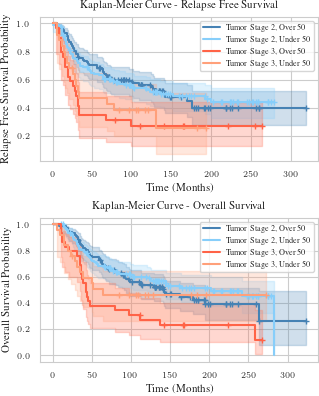

In [60]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=2, ncols=1))
colors_1 = ['steelblue', 'tomato']
colors_2 = ['lightskyblue', 'lightsalmon']

fig, (ax1, ax2) = plt.subplots(2,1)


for i, tumor_stage in enumerate([2,3]):
        
        plt.sca(ax1)
        km1, km2 = kaplan_meier(df, tumor_stage, 'Relapse Free Status')
        
        km1.plot(color=colors_1[i], show_censors=True, censor_styles={'ms': 4})
        km2.plot(color=colors_2[i], show_censors=True, censor_styles={'ms': 4})
        
        
        plt.sca(ax2)
        km1, km2 = kaplan_meier(df, tumor_stage, 'Overall Survival')
        
        km1.plot(color=colors_1[i], show_censors=True, censor_styles={'ms': 4})
        km2.plot(color=colors_2[i], show_censors=True, censor_styles={'ms': 4})
    

    
ax1.set_title('Kaplan-Meier Curve - Relapse Free Survival')
ax1.set_xlabel('Time (Months)')
ax1.set_ylabel('Relapse Free Survival Probability')
ax1.legend()

ax2.set_title('Kaplan-Meier Curve - Overall Survival')
ax2.set_xlabel('Time (Months)')
ax2.set_ylabel('Overall Survival Probability')
ax2.legend()

plt.savefig('fig_KaplanMeier.pdf')
plt.show()